In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Old

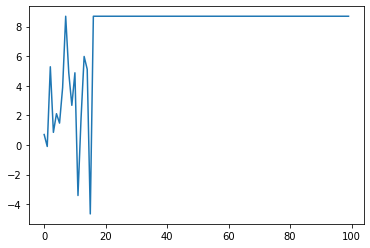

In [131]:
# Arms = [np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7)]

# n = 100
# k = 4*4
# delta = 0.1
# X = np.zeros(n)
# T = np.zeros(k)
# arms_mat = np.zeros((n,k))
# mu = np.zeros(k)

# A = np.zeros(n, dtype = int)
# for t in range(n):
#     all_A_t = np.zeros(k)
#     for i in range(k):
#         all_A_t[i] = UCB(i, delta)
#     A[t] = np.argmax(all_A_t)
# #     print(T[A[t]])
#     X[t] = Arms[int(A[t])]
#     T[A[t]] += 1
#     arms_mat[t, A[t]] = X[t]
#     mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]])
    
# plt.plot(X)

## Actual

In [ ]:
def UCB(i, delta, mu, T):
    if T[i] == 0:
        return 1000000000000
    else:
        return mu[i] + np.sqrt(2 * np.log(1/delta)/T[i])

In [170]:
def UCB_tot(n, delta, k, means, std):
    

#     n = 1000
#     delta = 0.1
    X = np.zeros(n)
    T = np.zeros(k)
    arms_mat = np.zeros((n,k))
    mu = np.zeros(k)

    A = np.zeros(n, dtype = int)
    for t in range(n):
        all_A_t = np.zeros(k)
        for i in range(k):
            all_A_t[i] = UCB(i, delta, mu, T)
        A[t] = np.argmax(all_A_t)
        X[t] = launch_arm(A[t])
        T[A[t]] += 1
        arms_mat[t, A[t]] = X[t]
        mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]])
    return X


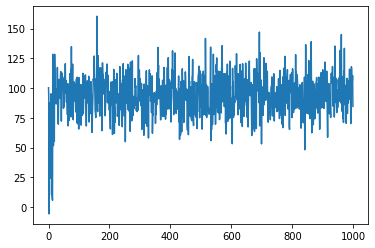

In [175]:
n = 1000
delta = 0.1

#Total number of arms
k = 20

means = [100*np.random.rand() for i in range(k)]
std = [20*np.random.rand() for i in range(k)]

#Return reward of arm i
def launch_arm(i):
    return np.random.normal(means[i],std[i])

plt.plot(UCB_tot(n, delta, k, means, std))